In [1]:
library(Seurat)
library(WGCNA)
library(igraph)
library(ggplot2)
library(pheatmap)

Attaching SeuratObject

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor



Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [2]:
as_matrix <- function(mat){
  
  tmp <- matrix(data=0L, nrow = mat@Dim[1], ncol = mat@Dim[2])
  
  row_pos <- mat@i+1
  col_pos <- findInterval(seq(mat@x)-1,mat@p[-1])+1
  val <- mat@x
  
  for (i in seq_along(val)){
    tmp[row_pos[i],col_pos[i]] <- val[i]
  }
  
  row.names(tmp) <- mat@Dimnames[[1]]
  colnames(tmp) <- mat@Dimnames[[2]]
  return(tmp)
}

In [5]:
dataobj<- readRDS('/data1//chenyx//HHCAd//unit_organized/LA.seuratobj.rds')

In [6]:
table(dataobj$cell_type)


         Adipocyte Cardiomyocyte cell   Endothelial cell         Fibroblast 
              3667              25759               6529              31282 
        Lymphocyte          Myelocyte             Neuron           Pericyte 
               516               6417                733               6465 
Smooth muscle cell 
              4379 

# CM

In [7]:
ct = "Cardiomyocyte cell"

In [8]:
cm.sample <- subset(dataobj,cell_type==ct,downsample=10000,seed=1234)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [9]:
df <- df[apply(df,1,mad)>0,]

In [10]:
dim(df)

[1]   154 15152

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

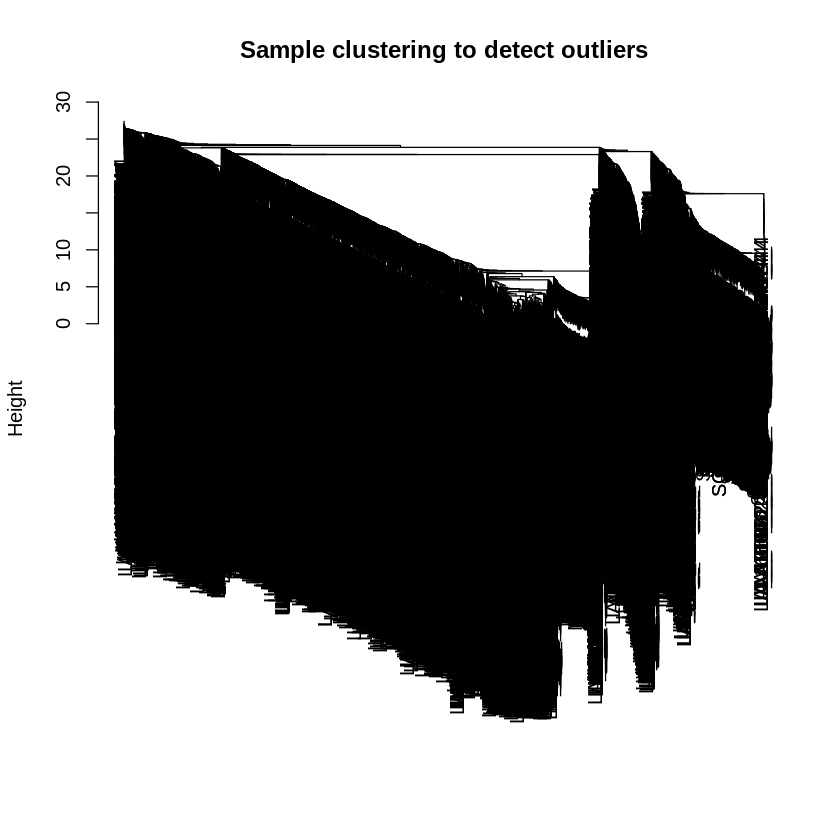

In [11]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [12]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 12 genes from module 1 because their KME is too low.
     ..removing 3 genes from module 2 because their KME is too low.
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15
       Calculating new MEs...


TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


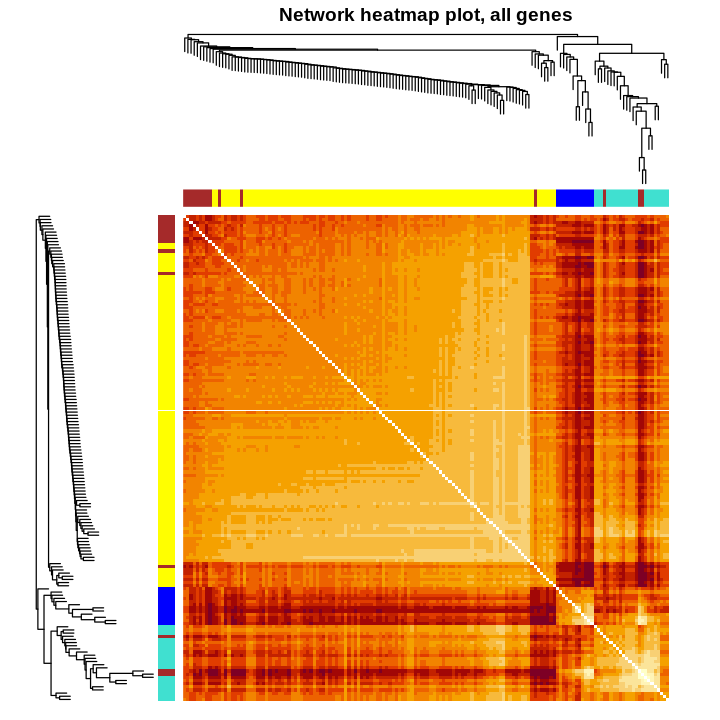

In [13]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

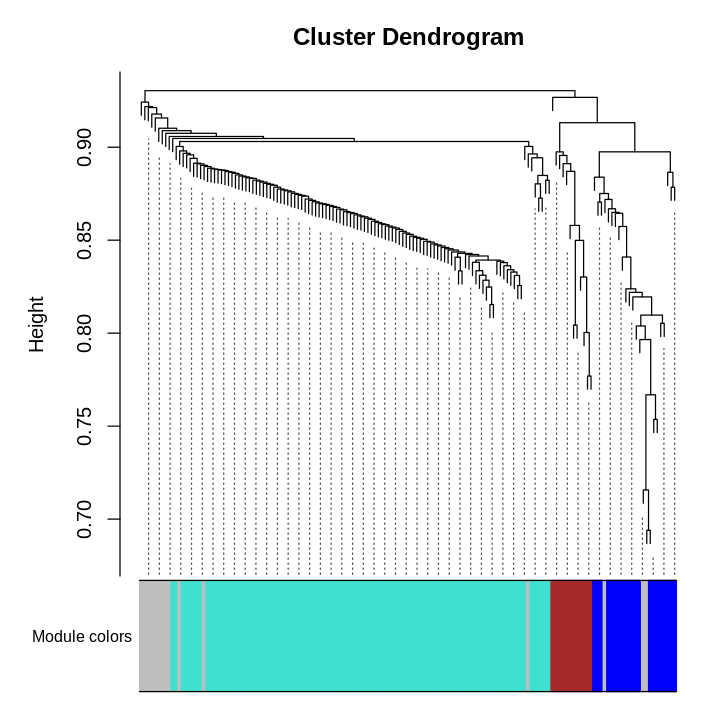

In [14]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [15]:
table(net$colors)


     blue     brown      grey turquoise 
       21        12        15       106 

In [16]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [17]:
googene <- colnames(datExpr_filted)[net$colors == "turquoise"]
TOMp <- TOM[googene,googene]
df_ct=TOMp
df_ct <- df_ct -diag(dim(df_ct)[1])

In [18]:
write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Adult/','LA/',ct,'.1.csv'))

In [19]:
googene <- colnames(datExpr_filted)[net$colors == "blue"]
TOMp <- TOM[googene,googene]
df_ct=TOMp
df_ct <- df_ct -diag(dim(df_ct)[1])

In [20]:
write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Adult/','LA/',ct,'.2.csv'))

In [21]:
googene <- colnames(datExpr_filted)[net$colors == "brown"]
TOMp <- TOM[googene,googene]
df_ct=TOMp
df_ct <- df_ct -diag(dim(df_ct)[1])

In [22]:
write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Adult/','LA/',ct,'.3.csv'))

# Fb

In [23]:
ct = "Fibroblast"

In [24]:
cm.sample <- subset(dataobj,cell_type==ct,downsample=10000,seed=1234)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [25]:
df <- df[apply(df,1,mad)>0,]

In [26]:
dim(df)

[1]   125 14619

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

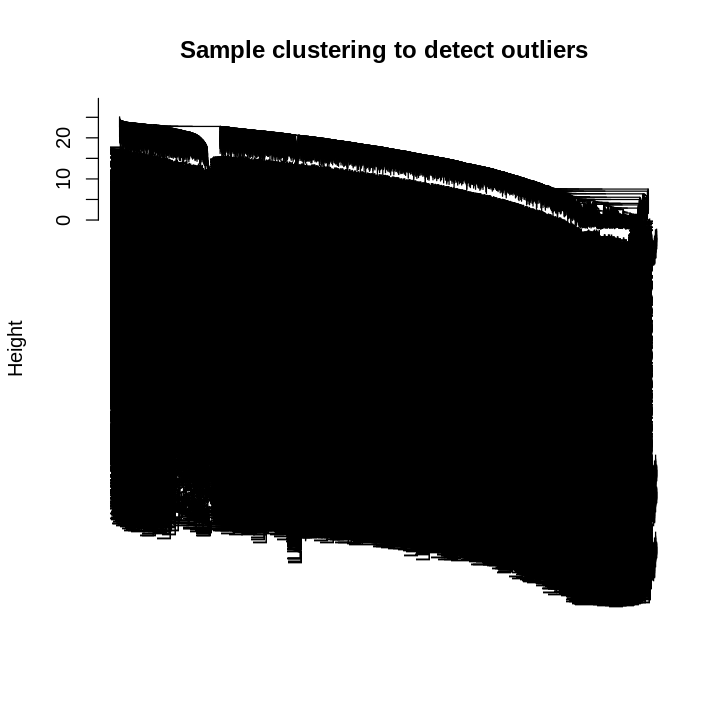

In [27]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [28]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 3 genes from module 2 because their KME is too low.
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15
     mergeCloseModules: less than two proper modules.
      ..color levels are blue, grey
      ..there is nothing to merge.
       Calculating new MEs...


TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


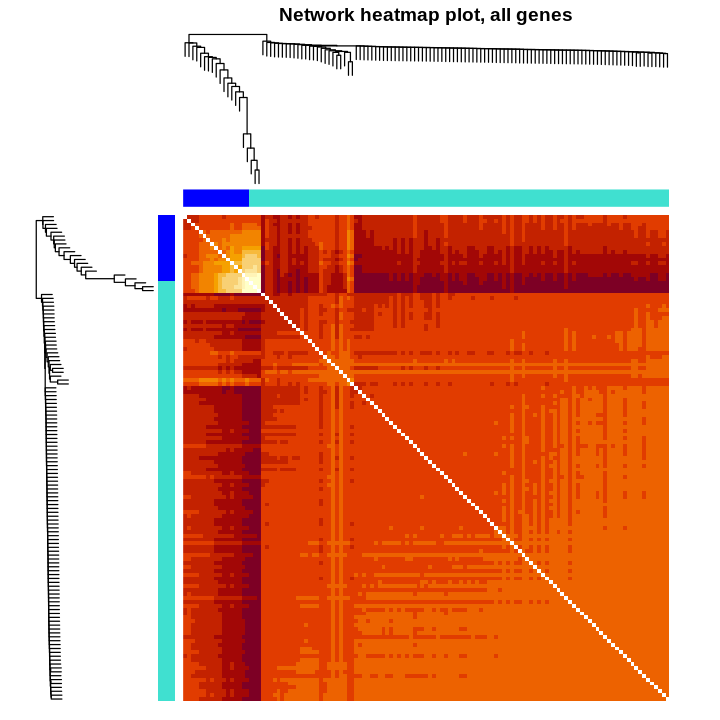

In [29]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

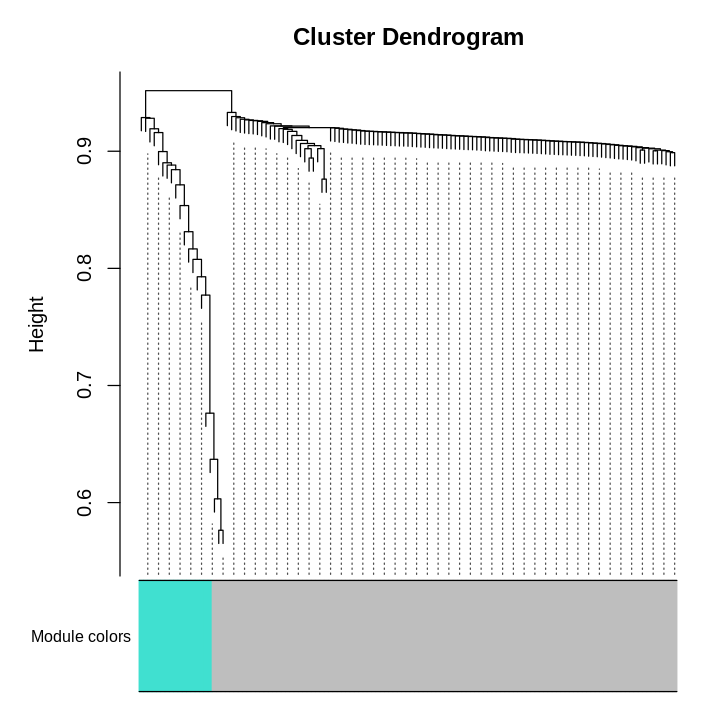

In [30]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [31]:
table(net$colors)


     grey turquoise 
      108        17 

In [32]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [33]:
googene <- colnames(datExpr_filted)[net$colors == "turquoise"]
TOMp <- TOM[googene,googene]
df_ct=TOMp
df_ct <- df_ct -diag(dim(df_ct)[1])

In [34]:
write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Adult/','LA/',ct,'.csv'))

# EC

In [35]:
ct = "Endothelial cell"

In [36]:
cm.sample <- subset(dataobj,cell_type==ct,downsample=10000,seed=1234)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [37]:
df <- df[apply(df,1,mad)>0,]

In [38]:
dim(df)

[1]   52 6529

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

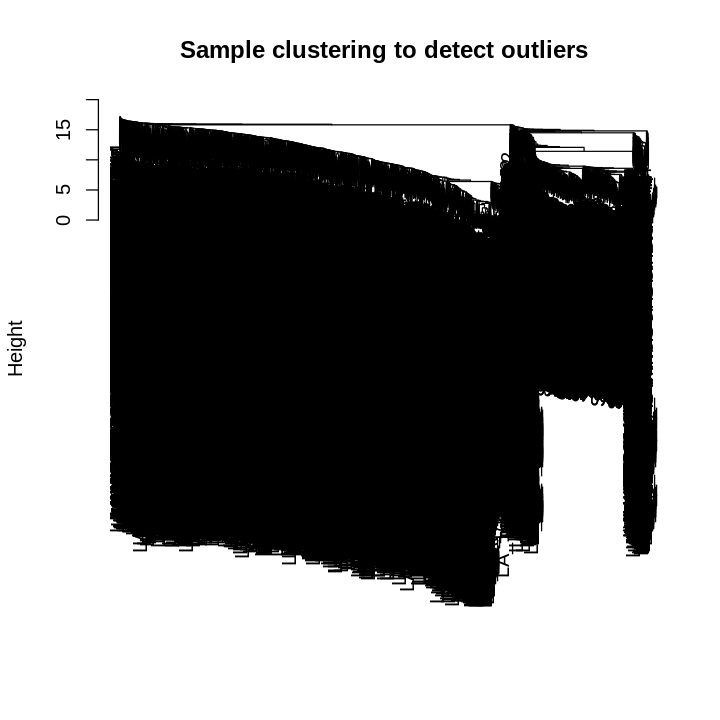

In [39]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [40]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 13 genes from module 1 because their KME is too low.
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15
     mergeCloseModules: less than two proper modules.
      ..color levels are grey, turquoise
      ..there is nothing to merge.
       Calculating new MEs...


TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


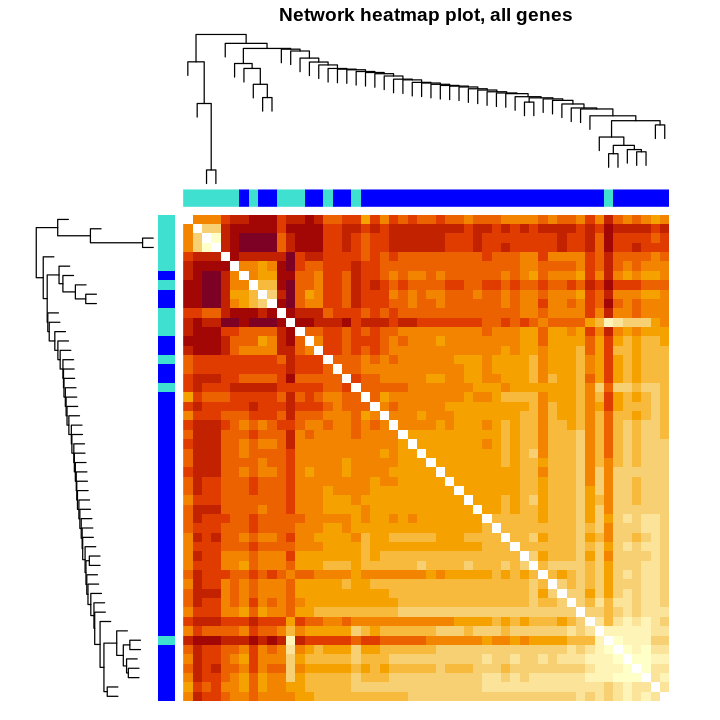

In [41]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

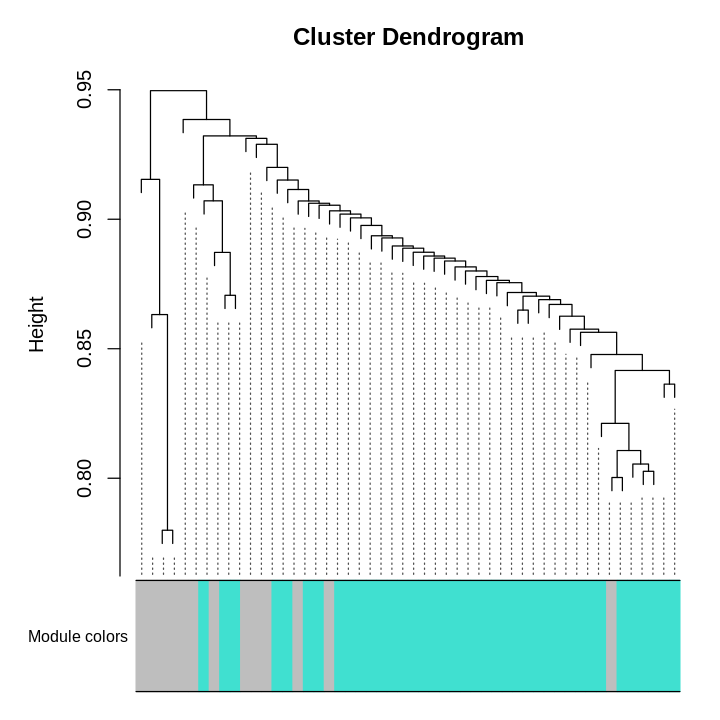

In [42]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [43]:
table(net$colors)


     grey turquoise 
       13        39 

In [44]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [45]:
googene <- colnames(datExpr_filted)[net$colors == "turquoise"]
TOMp <- TOM[googene,googene]
df_ct=TOMp
df_ct <- df_ct -diag(dim(df_ct)[1])

In [46]:
write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Adult/','LA/',ct,'.csv'))

# Myelo

In [47]:
ct = "Myelocyte"

In [48]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [49]:
df <- df[apply(df,1,mad)>0,]

In [50]:
dim(df)

[1]   78 6417

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

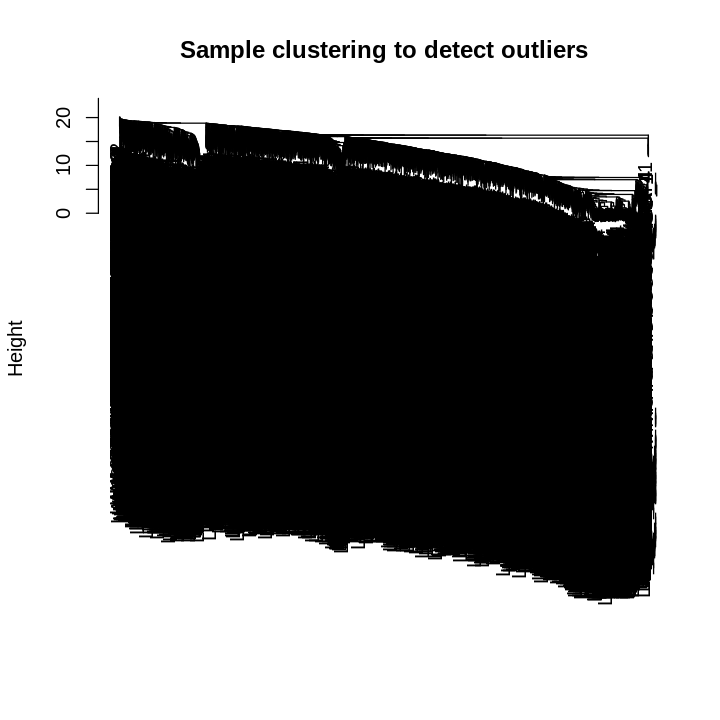

In [51]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [52]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 29 genes from module 1 because their KME is too low.
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15
     mergeCloseModules: less than two proper modules.
      ..color levels are grey, turquoise
      ..there is nothing to merge.
       Calculating new MEs...


TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


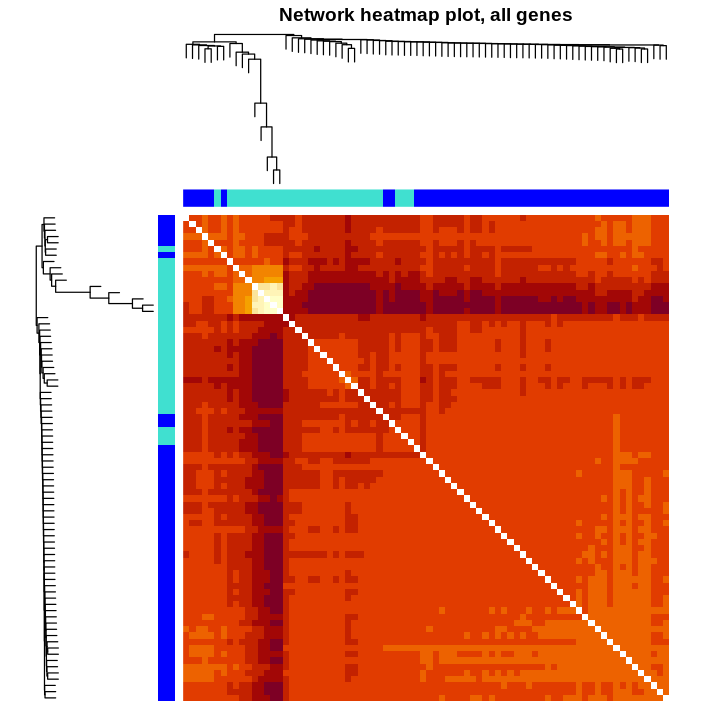

In [53]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

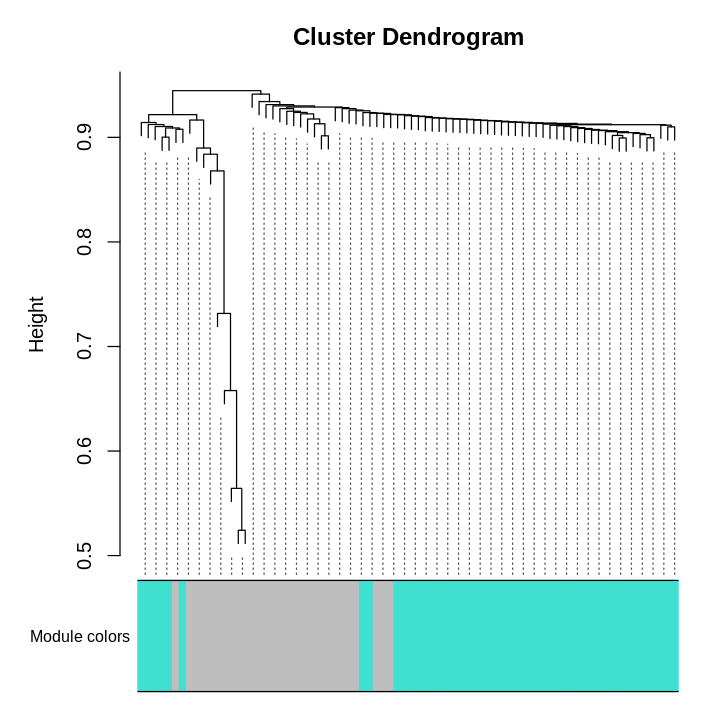

In [54]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [55]:
table(net$colors)


     grey turquoise 
       29        49 

In [56]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [57]:
googene <- colnames(datExpr_filted)[net$colors == "turquoise"]
TOMp <- TOM[googene,googene]
df_ct=TOMp
df_ct <- df_ct -diag(dim(df_ct)[1])

In [58]:
write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Adult/','LA/',ct,'.csv'))

# Peri

In [59]:
ct = "Pericyte"

In [60]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [61]:
df <- df[apply(df,1,mad)>0,]

In [62]:
dim(df)

[1]   65 6465

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

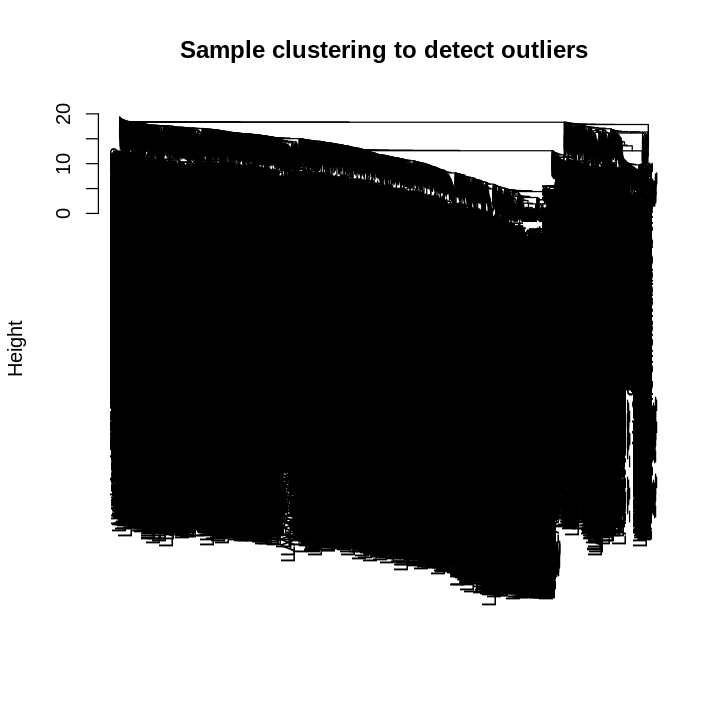

In [63]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [64]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 22 genes from module 1 because their KME is too low.
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15
     mergeCloseModules: less than two proper modules.
      ..color levels are grey, turquoise
      ..there is nothing to merge.
       Calculating new MEs...


TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


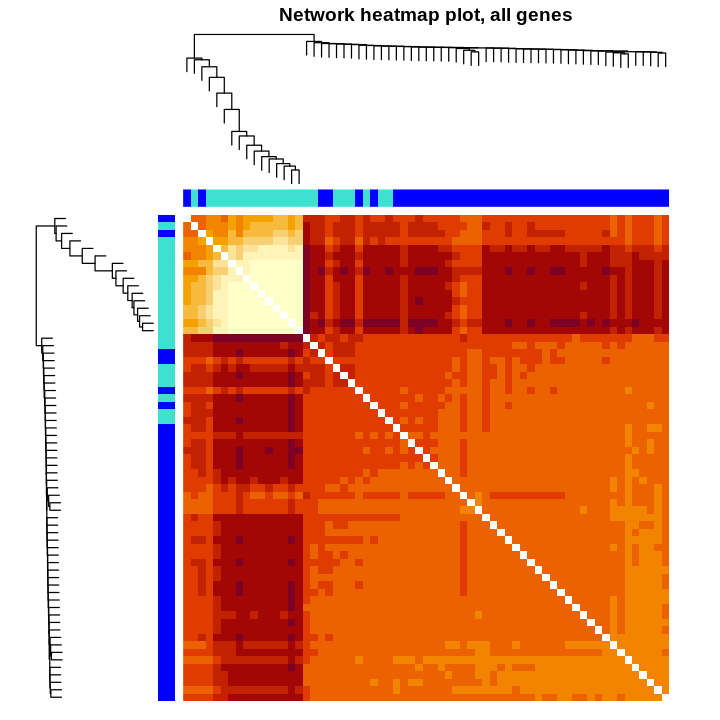

In [65]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

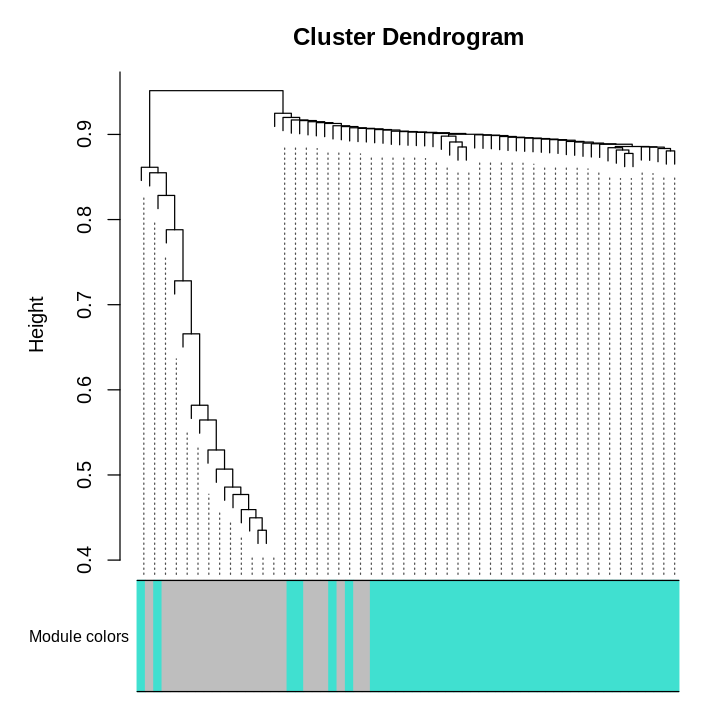

In [66]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [67]:
table(net$colors)


     grey turquoise 
       22        43 

In [68]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [69]:
googene <- colnames(datExpr_filted)[net$colors == "turquoise"]
TOMp <- TOM[googene,googene]
df_ct=TOMp
df_ct <- df_ct -diag(dim(df_ct)[1])

In [70]:
write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Adult/','LA/',ct,'.csv'))

# SMC

In [71]:
ct = "Smooth muscle cell"

In [72]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [73]:
df <- df[apply(df,1,mad)>0,]

In [74]:
dim(df)

[1]  137 4379

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

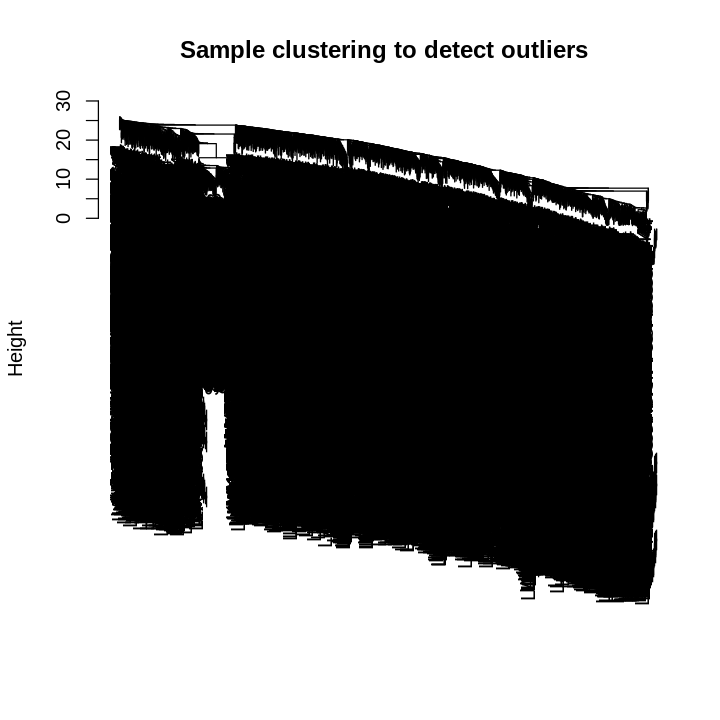

In [75]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [76]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 18 genes from module 1 because their KME is too low.
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15
       Calculating new MEs...


TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


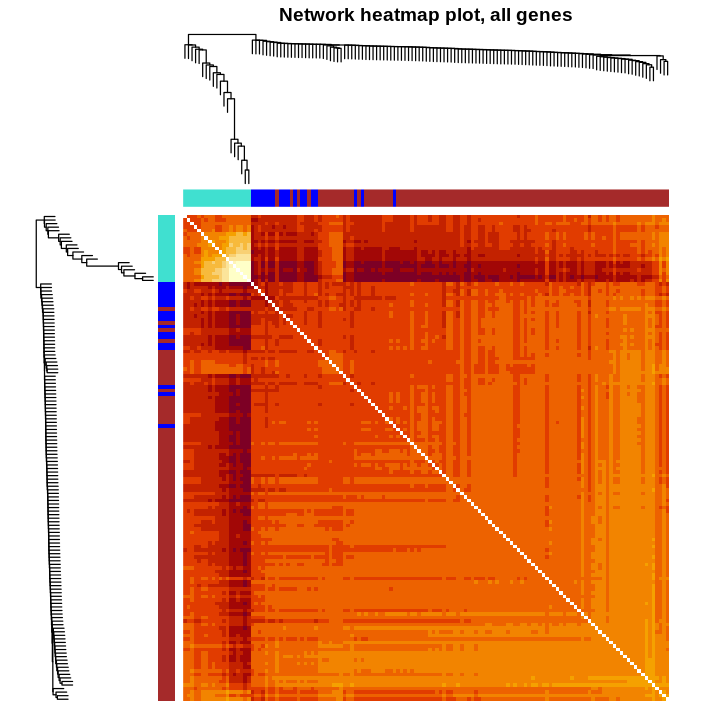

In [77]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

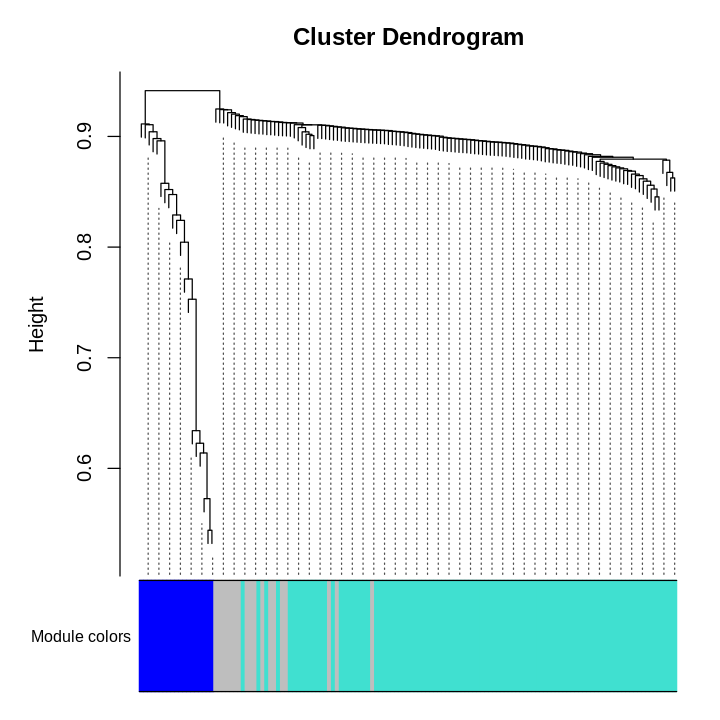

In [78]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [79]:
table(net$colors)


     blue      grey turquoise 
       19        18       100 

In [80]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [81]:
googene <- colnames(datExpr_filted)[net$colors == "turquoise"]
TOMp <- TOM[googene,googene]
df_ct=TOMp
df_ct <- df_ct -diag(dim(df_ct)[1])

In [82]:
write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Adult/','LA/',ct,'.1.csv'))

In [83]:
googene <- colnames(datExpr_filted)[net$colors == "blue"]
TOMp <- TOM[googene,googene]
df_ct=TOMp
df_ct <- df_ct -diag(dim(df_ct)[1])

In [84]:
write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Adult/','LA/',ct,'.2.csv'))

# Neuron

In [85]:
ct = "Neuron"

In [86]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [87]:
df <- df[apply(df,1,mad)>0,]

In [88]:
dim(df)

[1]  43 733

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

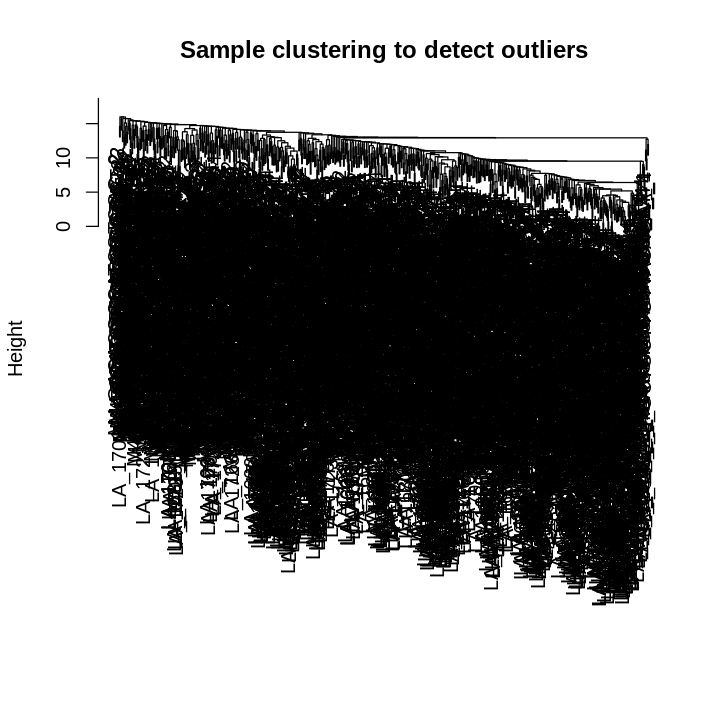

In [89]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [90]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 27 genes from module 1 because their KME is too low.
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15
     mergeCloseModules: less than two proper modules.
      ..color levels are grey, turquoise
      ..there is nothing to merge.
       Calculating new MEs...


TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


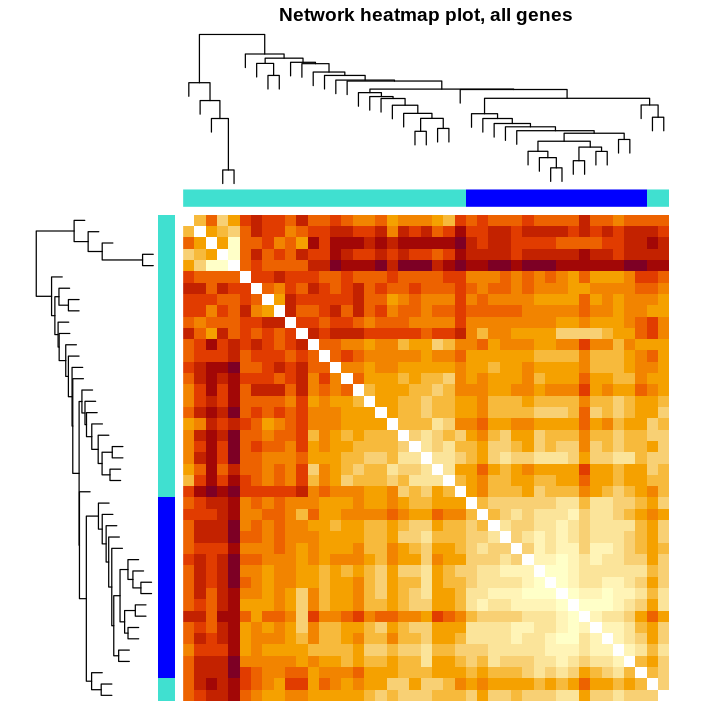

In [91]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

Warning message in pmin(objHeights[dendro$order][floor(positions)], objHeights[dendro$order][ceiling(positions)]):
“an argument will be fractionally recycled”


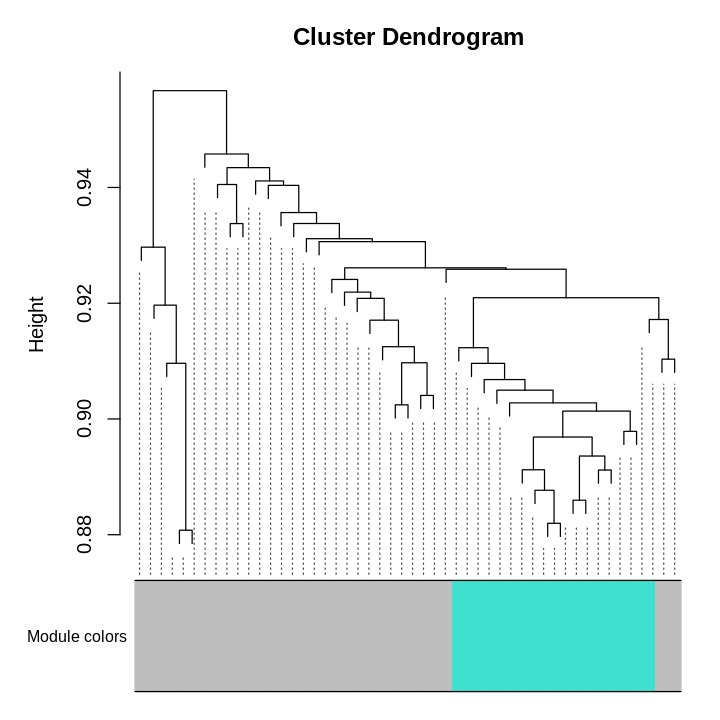

In [92]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [93]:
table(net$colors)


     grey turquoise 
       27        16 

In [94]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [95]:
googene <- colnames(datExpr_filted)[net$colors == "turquoise"]
TOMp <- TOM[googene,googene]
df_ct=TOMp
df_ct <- df_ct -diag(dim(df_ct)[1])

In [96]:
write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Adult/','LA/',ct,'.csv'))

# Lympho

In [97]:
ct = "Lymphocyte"

In [98]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [99]:
df <- df[apply(df,1,mad)>0,]

In [100]:
dim(df)

[1]  11 516

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

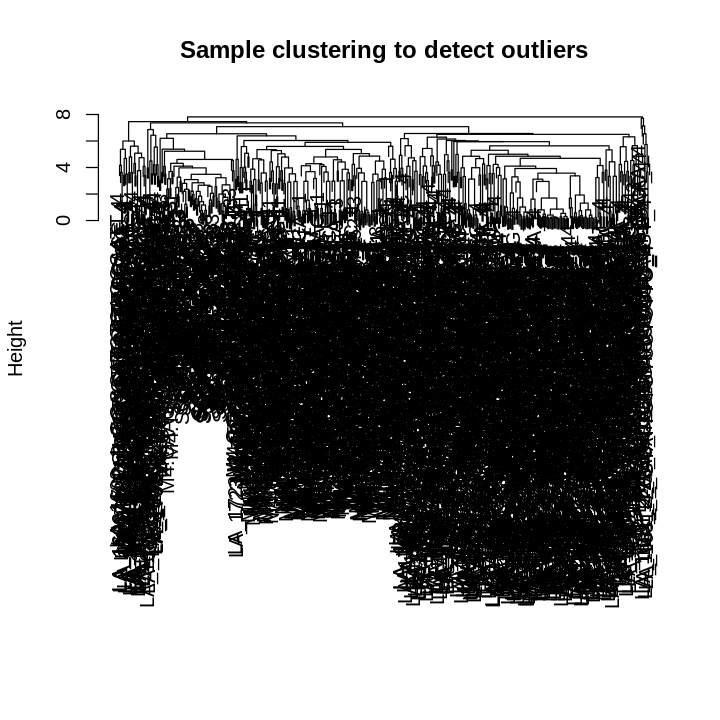

In [101]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [102]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
 No significant modules detected in block 1
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15


Warning message in blockwiseModules(datExpr_filted, power = 5, corType = "bicor", :
“blockwiseModules: mergeCloseModules failed with the following error message:
     Error in mergeCloseModules(datExpr, colors[gsg$goodGenes], cutHeight = mergeCutHeight,  : 
  Error in moduleEigengenes(expr = exprData[[set]]$data, colors = setColors,  : 
  Color levels are empty. Possible reason: the only color is grey and grey module is excluded from the calculation.

 
--> returning unmerged colors.
”


TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


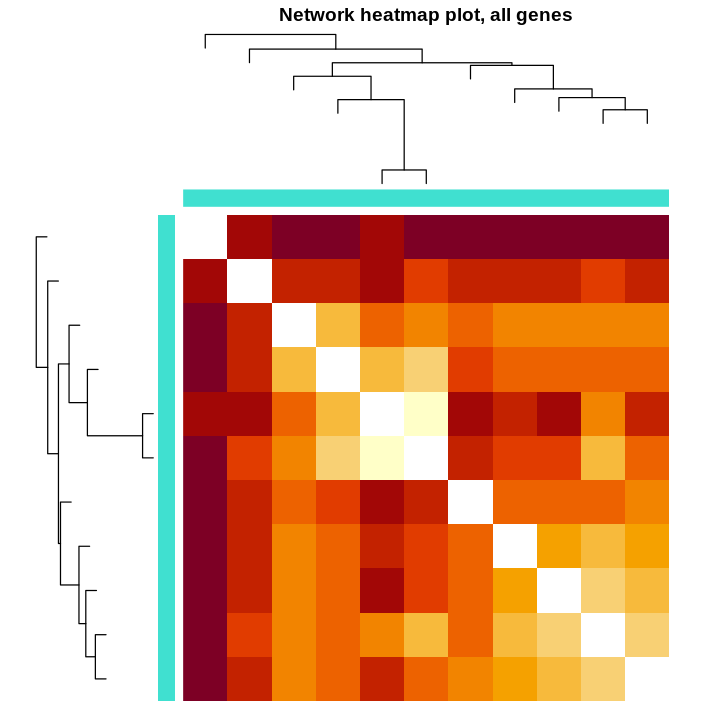

In [103]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

Warning message in pmin(objHeights[dendro$order][floor(positions)], objHeights[dendro$order][ceiling(positions)]):
“an argument will be fractionally recycled”


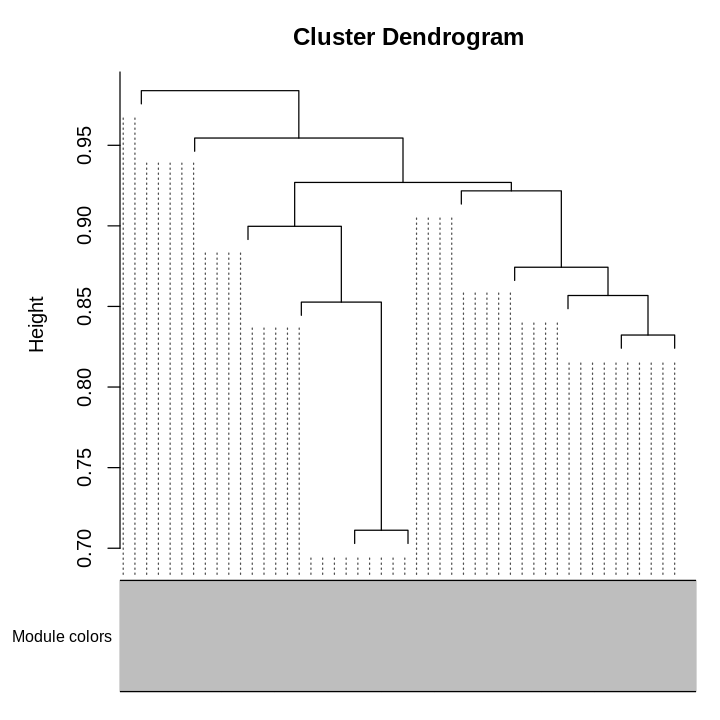

In [104]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [105]:
table(net$colors)


grey 
  11 

In [106]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [107]:
googene <- colnames(datExpr_filted)[net$colors == "grey"]
TOMp <- TOM[googene,googene]
df_ct=TOMp
df_ct <- df_ct -diag(dim(df_ct)[1])

In [108]:
write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Adult/','LA/',ct,'.csv'))

# Adipocyte

In [109]:
ct = "Adipocyte"

In [110]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [111]:
df <- df[apply(df,1,mad)>0,]

In [112]:
dim(df)

[1]  504 3667

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

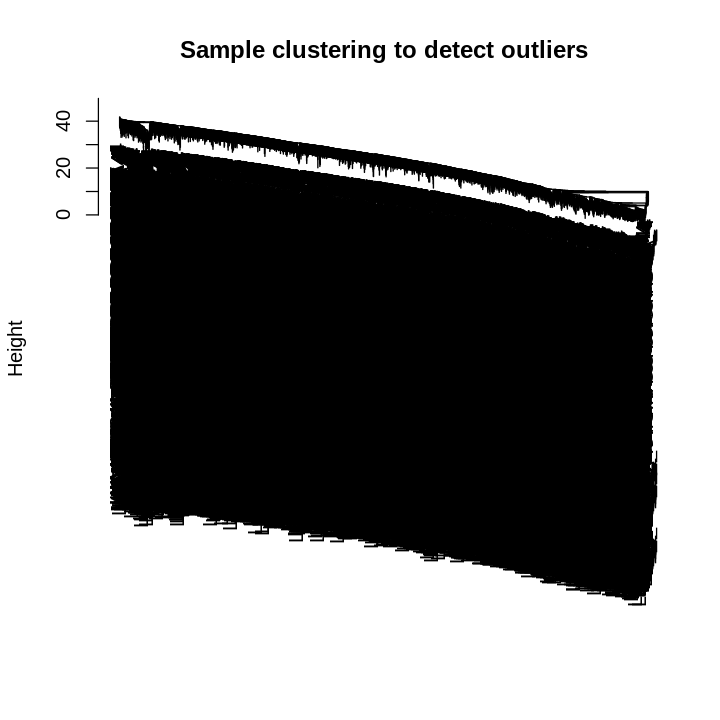

In [113]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [114]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 104 genes from module 1 because their KME is too low.
     ..removing 11 genes from module 2 because their KME is too low.
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15
       Calculating new MEs...


TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


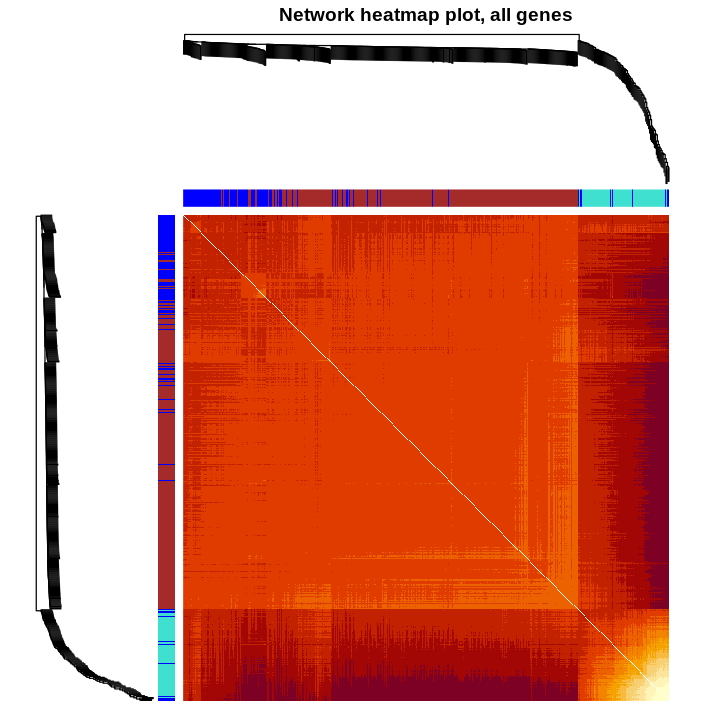

In [115]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

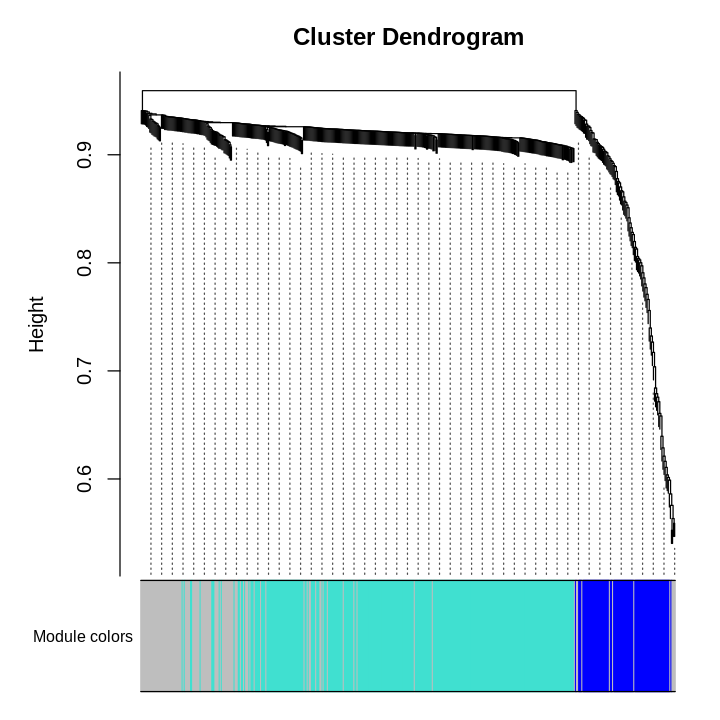

In [116]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [117]:
table(net$colors)


     blue      grey turquoise 
       84       115       305 

In [118]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [119]:
googene <- colnames(datExpr_filted)[net$colors == "turquoise"]
TOMp <- TOM[googene,googene]
df_ct=TOMp
df_ct <- df_ct -diag(dim(df_ct)[1])

In [120]:
write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Adult/','LA/',ct,'.1.csv'))

In [121]:
googene <- colnames(datExpr_filted)[net$colors == "blue"]
TOMp <- TOM[googene,googene]
df_ct=TOMp
df_ct <- df_ct -diag(dim(df_ct)[1])

In [122]:
write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Adult/','LA/',ct,'.2.csv'))